<a href="https://colab.research.google.com/github/ROhitasware/Sales-Performance-Analysis/blob/main/Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ecommerce_customer_data_custom_ratios.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Overview:")
print(data.head())


Dataset Overview:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Chris

In [2]:
# Check dataset structure and summary
print("Dataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB

Missing Values:


In [3]:
# Drop duplicate columns (e.g., 'Age' and 'Customer Age')
data.drop(columns=['Customer Age'], inplace=True)

# Convert 'Purchase Date' to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Fill missing values in 'Returns' with 0 (assume no returns for missing data)
data['Returns'] = data['Returns'].fillna(0)

# Check cleaned dataset
print("Cleaned Dataset:")
print(data.head())


Cleaned Dataset:
   Customer ID       Purchase Date Product Category  Product Price  Quantity  \
0        46251 2020-09-08 09:38:32      Electronics             12         3   
1        46251 2022-03-05 12:56:35             Home            468         4   
2        46251 2022-05-23 18:18:01             Home            288         2   
3        46251 2020-11-12 13:13:29         Clothing            196         1   
4        13593 2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Returns        Customer Name  Age  \
0                    740    Credit Card      0.0  Christine Hernandez   37   
1                   2739         PayPal      0.0  Christine Hernandez   37   
2                   3196         PayPal      0.0  Christine Hernandez   37   
3                   3509         PayPal      0.0  Christine Hernandez   37   
4                   3452    Credit Card      0.0          James Grant   49   

   Gender  Churn  
0    Male     

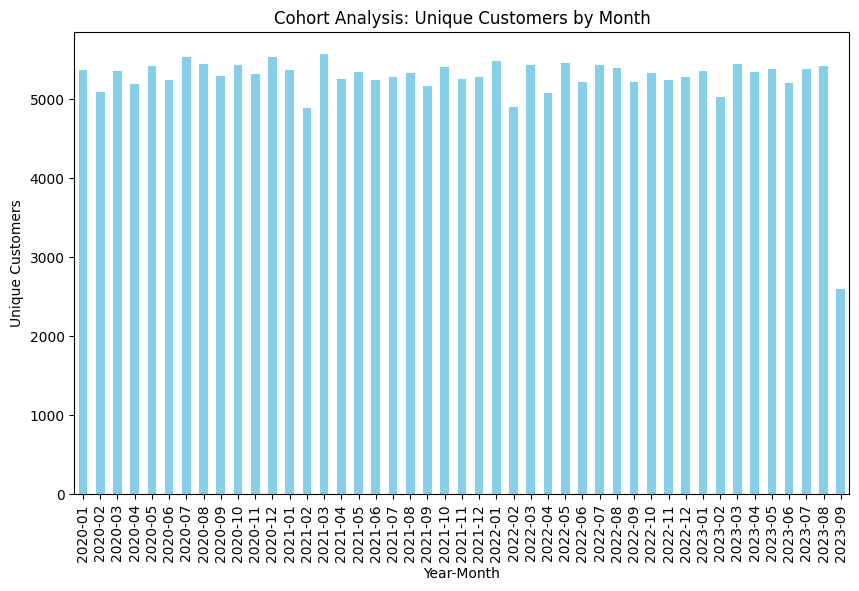

In [4]:
# Extract year and month for cohort analysis
data['Purchase YearMonth'] = data['Purchase Date'].dt.to_period('M')

# Group by cohort
cohort = data.groupby('Purchase YearMonth')['Customer ID'].nunique()
cohort.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Cohort Analysis: Unique Customers by Month")
plt.xlabel("Year-Month")
plt.ylabel("Unique Customers")
plt.show()


In [5]:
# Calculate RFM metrics
current_date = data['Purchase Date'].max() + pd.Timedelta(days=1)

rfm = data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (current_date - x.max()).days,
    'Customer ID': 'count',
    'Total Purchase Amount': 'sum'
}).rename(columns={
    'Purchase Date': 'Recency',
    'Customer ID': 'Frequency',
    'Total Purchase Amount': 'Monetary'
})

# Add RFM segments
rfm['RFM_Segment'] = (
    (rfm['Recency'] <= 30).astype(int).astype(str) +
    (rfm['Frequency'] >= 3).astype(int).astype(str) +
    (rfm['Monetary'] >= rfm['Monetary'].median()).astype(int).astype(str)
)

print("Top RFM Segments:")
print(rfm.head())


Top RFM Segments:
             Recency  Frequency  Monetary RFM_Segment
Customer ID                                          
1                 58          1      3491         000
2                299          3      7988         010
3                 89          8     22587         011
4                127          4      8715         010
5                171          8     12524         010


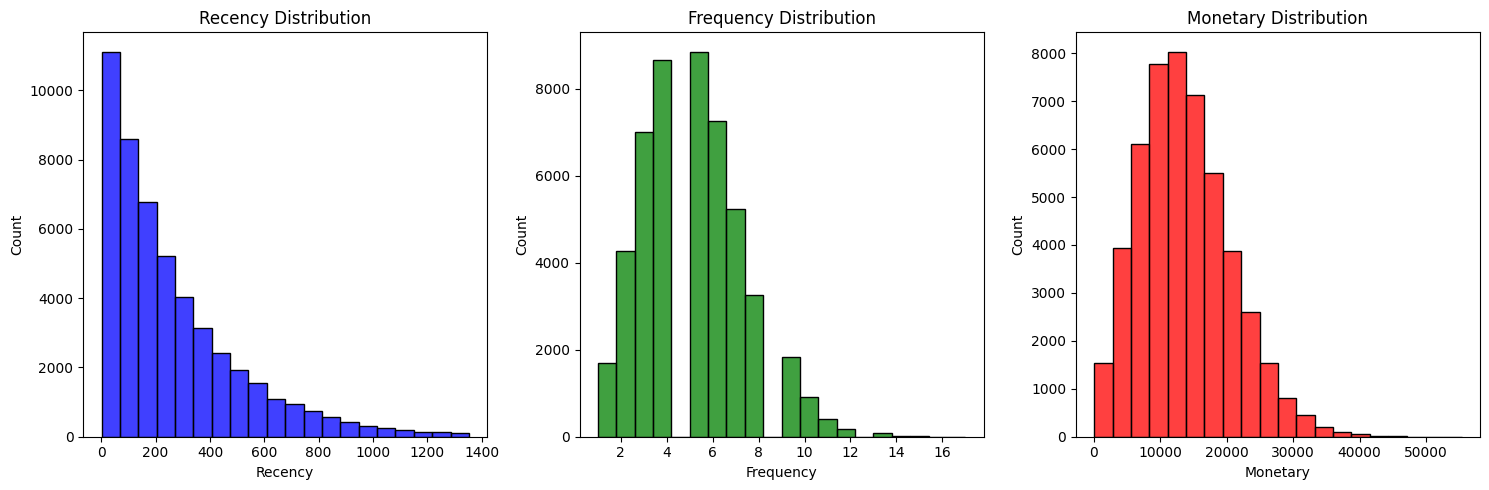

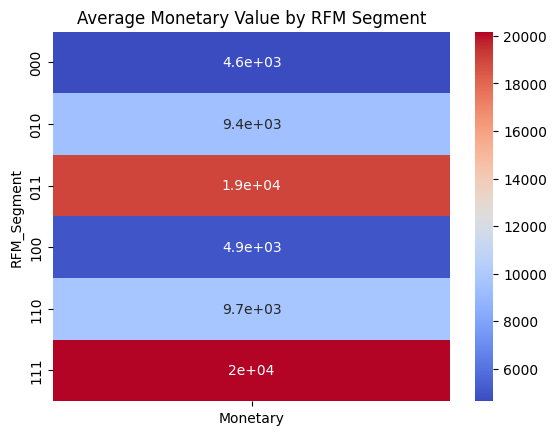

In [6]:
# Histograms for RFM
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=False, bins=20, color='blue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=False, bins=20, color='green')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=False, bins=20, color='red')
plt.title('Monetary Distribution')
plt.tight_layout()
plt.show()

# Heatmap of RFM segments
rfm_pivot = rfm.pivot_table(index='RFM_Segment', values='Monetary', aggfunc='mean')
sns.heatmap(rfm_pivot, cmap='coolwarm', annot=True)
plt.title("Average Monetary Value by RFM Segment")
plt.show()


### Key Insights from Customer Behavior Analysis:

1. **Loyal and High-Spending Customers**: Customers with high RFM (Recency, Frequency, and Monetary) scores represent the most valuable segment. These customers are recent buyers, purchase frequently, and spend significantly. They should be rewarded with loyalty programs and exclusive offers to maintain engagement.

2. **Re-engagement Opportunities**: Customers with high recency (recent transactions) but low frequency (infrequent purchases) may need encouragement to buy more often. Consider targeted campaigns such as follow-up emails, limited-time offers, or personalized recommendations.

3. **Low Monetary Value Customers**: Customers with low monetary value contribute minimally to revenue. Strategies like discounts, bundled offers, or tiered pricing can help increase their spending while also improving customer retention.

4. **Segmentation-Based Targeting**: By leveraging RFM segments, businesses can create tailored marketing strategies, optimize resource allocation, and maximize return on investment (ROI).